In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [4]:
train.shape

(800, 22)

In [5]:
test.shape

(200, 21)

In [6]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.00000,800.000000,800.00000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.582500,0.28625,0.321250,0.41500,0.457500,0.20875,0.273750,0.717500,0.316250,0.460000,28.612306,7.058530,0.231250
std,231.0844,0.493455,0.45229,0.467249,0.49303,0.498502,0.40667,0.446161,0.450497,0.465303,0.498709,12.872373,3.788969,0.421896
min,1.0000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,9.560505,-2.594654,0.000000
25%,200.7500,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,19.282082,4.527556,0.000000
50%,400.5000,1.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,25.479960,6.893472,0.000000
75%,600.2500,1.000000,1.00000,1.000000,1.00000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,33.154755,9.892981,0.000000
max,800.0000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,72.402488,13.390868,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
# Check if any columns have only one unqiue value

for col in train.columns:
    if len(train[col].value_counts()) == 1:
        print(col)

age_desc


In [9]:
train["age_desc"].value_counts()

18 and more    800
Name: age_desc, dtype: int64

there's only one category provided in age description which wont be of any use, lets drop it

In [10]:
# lets create age groups
train['age_group'] = pd.cut(x=train['age'], bins=[9, 12, 17 , 79], labels=['Kids', 'Teens', 'Adults'])
train.age_group = train.age_group.astype(object)

In [11]:
train[['age_group','age']].head()

,age_group,age
0,Adults,18.605397
1,Teens,13.829369
2,Teens,14.679893
3,Adults,61.035288
4,Teens,14.256686


Dython is a set of data analysis tools in python 3.x, which can let you get more insights into your data.<br>
This library was designed with analysis usage in mind. <br>
Ease-of-use, functionality, and readability are the core values of this library.<br>
Dython will automatically find which features are categorical and which are numerical, compute a relevant measure of association between each and every feature, and plot it all as an easy-to-read heat-map.<br>
credits: https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26

In [12]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(train)
categorical_features

['gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'age_desc',
 'relation',
 'age_group']

#### Univariate analysis

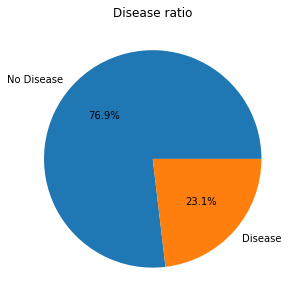

In [13]:
fig, ax = plt.subplots(figsize =(8, 5))
plt.pie(train['Class/ASD'].value_counts()/len(train)*100, labels=["No Disease","Disease"] ,autopct='%1.1f%%')
ax.set_title("Disease ratio")
plt.show()

In [14]:
train['Class/ASD'].value_counts()

0    615
1    185
Name: Class/ASD, dtype: int64

This is quite imbalanced dataset

In [15]:
def disp_perc():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{round(height*100,2)}%', (x + width/2, y + height*1.02), ha='center')

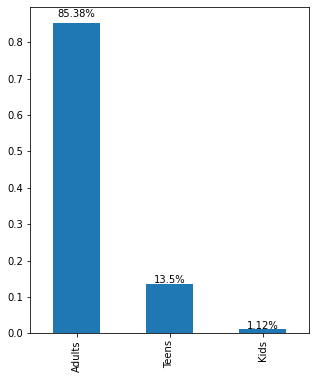

In [16]:
ax = train["age_group"].value_counts(normalize=True).plot.bar(figsize =(5,6))

disp_perc()
plt.show()

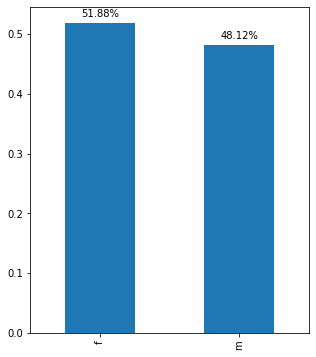

In [17]:
ax = train["gender"].value_counts(normalize=True).plot.bar(figsize =(5,6))
disp_perc()
plt.show()

gender is balanced

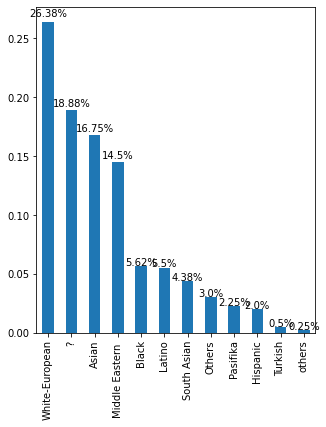

In [18]:
ax = train["ethnicity"].value_counts(normalize=True).plot.bar(figsize =(5,6))
disp_perc()
plt.show()

there is unknown ethnicity category ( ? ) accounting 18.8% of data <br>
also there is two category with typo ( Others and others ) which we can combine

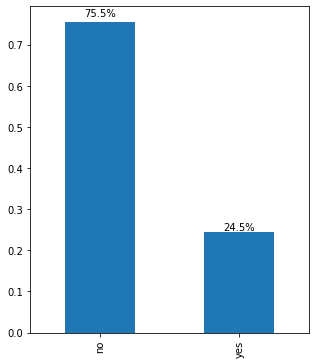

In [19]:
ax = train["jaundice"].value_counts(normalize=True).plot.bar(figsize =(5,6))
disp_perc()
plt.show()

75.5% people do not have jaundice

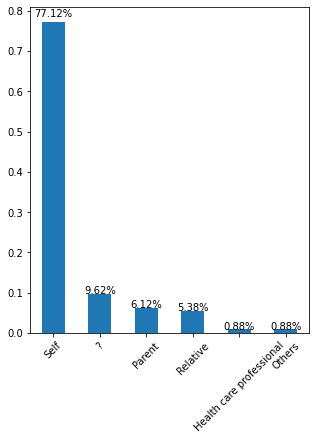

In [20]:
ax = train["relation"].value_counts(normalize=True).plot.bar(figsize =(5,6))
plt.xticks(rotation=45)
disp_perc()
plt.show()

77% of people have came for diagnosis on their own

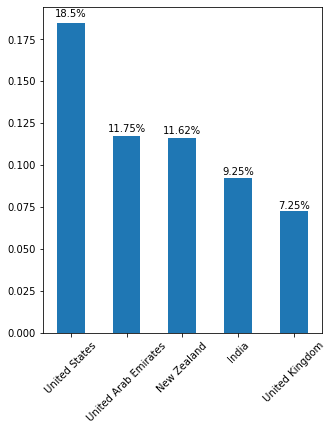

In [21]:
# lets plot only top 5 countries as we have 60+ values
ax = train["contry_of_res"].value_counts(normalize=True).nlargest(5).plot.bar(figsize =(5,6))
plt.xticks(rotation=45)
disp_perc()
plt.show()

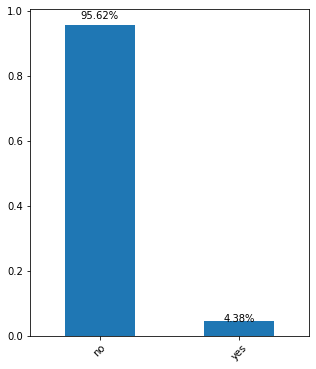

In [22]:
ax = train["used_app_before"].value_counts(normalize=True).plot.bar(figsize =(5,6))
plt.xticks(rotation=45)
disp_perc()
plt.show()

95% people havent used the app before

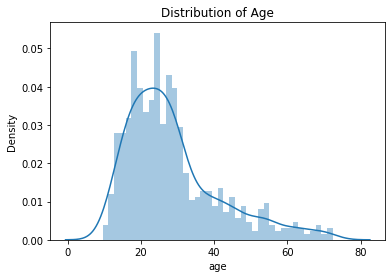

In [23]:
sns.distplot(train["age"], hist=True, kde=True, bins=40).set_title('Distribution of Age')
plt.show()

Age distribution is positively skewed, lets apply log transformation later

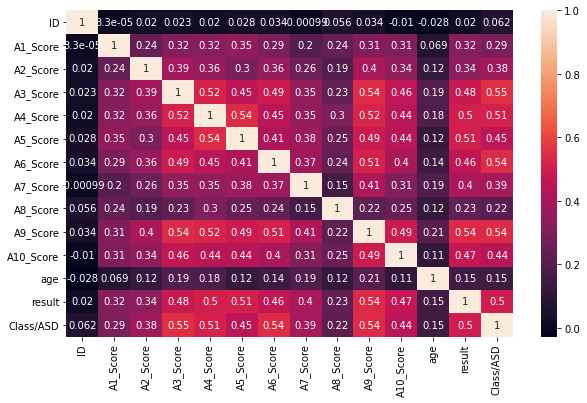

In [24]:
fig = plt.figure(figsize = (10,6))
sns.heatmap(data=train.corr(), annot=True)
plt.show()

Class is positively correlated with result, A9_score, A6_score, A4_score, A3_score

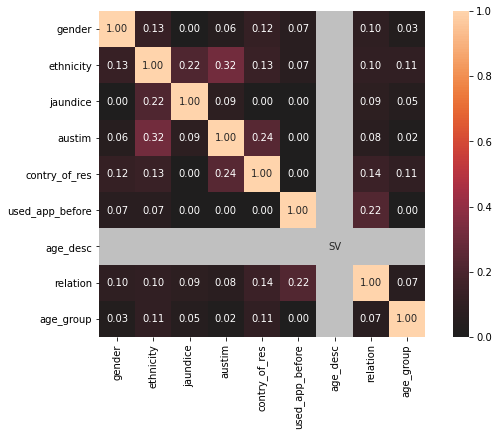

In [25]:
from dython.nominal import associations
categorical_correlation= associations(train[categorical_features], figsize=(10,6))

Class is positively correlated with country_of_res, ethnicity, austism

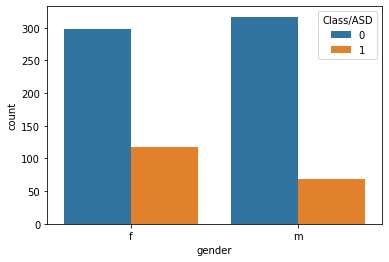

In [26]:
sns.countplot(hue='Class/ASD',x="gender",data=train)
plt.show()

count of female having autism is sligthly more than male

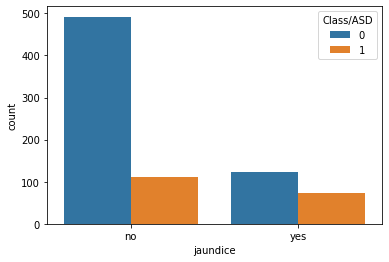

In [27]:
sns.countplot(hue='Class/ASD',x="jaundice",data=train)
plt.show()

there are many people who dont have jaundice and dont have ASD, number of people who had jaundice but dont have autism is more <br>
So having jaundice is not clear indicator for ASD

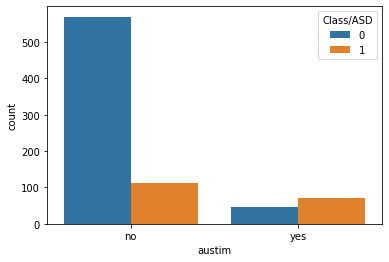

In [28]:
sns.countplot(hue='Class/ASD',x="austim", data=train)
plt.show()

People whose family members had autism are likely to have autism

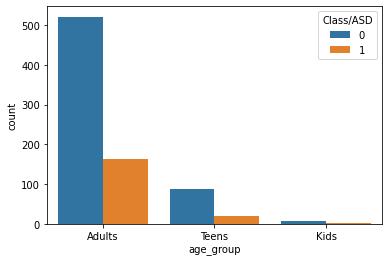

In [29]:
sns.countplot(hue='Class/ASD',x="age_group",data=train)
plt.show()

count of adults having autism is more compared to others

#### Missing Value analysis

In [30]:
# check missing values percentage in each column
train.isnull().mean().round(4).mul(100).sort_values(ascending=False).head()

ID           0.0
gender       0.0
Class/ASD    0.0
relation     0.0
age_desc     0.0
dtype: float64

There's no missing values

#### Data preprocessing

In [31]:
# change Others to others in ethnicity

train['ethnicity'] = train["ethnicity"].str.replace("Others", "others")

In [32]:
# change ? to unknown category
train['ethnicity'] = train['ethnicity'].str.replace("?", "unknown")
train['relation'] = train['relation'].str.replace("?", "unknown")

In [33]:
train["age"] = np.log(train["age"])

In [34]:
# drop unwanted columns
train = train.drop(['age_group','age_desc','contry_of_res','ID','used_app_before'], axis= 1)

In [35]:
train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,2.923452,f,White-European,no,no,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,2.626795,f,South Asian,no,no,10.544296,unknown,0
2,1,1,1,1,1,1,0,0,1,1,2.686479,f,White-European,no,no,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,4.111452,f,South Asian,no,no,1.530098,unknown,0
4,0,0,0,0,1,0,0,0,1,1,2.657226,m,Black,no,yes,7.949723,Self,0


In [36]:
le = LabelEncoder()
for col in ['austim', 'gender', 'jaundice']:
    train[col] = le.fit_transform(train[col])
train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,result,relation,Class/ASD
0,1,0,1,1,1,1,0,1,1,1,2.923452,0,White-European,0,0,7.819715,Self,0
1,0,0,0,0,0,0,0,0,0,1,2.626795,0,South Asian,0,0,10.544296,unknown,0
2,1,1,1,1,1,1,0,0,1,1,2.686479,0,White-European,0,0,13.167506,Self,1
3,0,0,0,1,0,0,0,0,0,0,4.111452,0,South Asian,0,0,1.530098,unknown,0
4,0,0,0,0,1,0,0,0,1,1,2.657226,1,Black,0,1,7.949723,Self,0


In [37]:
train = pd.get_dummies(train)

In [38]:
train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,ethnicity_unknown,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self,relation_unknown
0,1,0,1,1,1,1,0,1,1,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0


##### split data

In [40]:
X = train.drop(['Class/ASD'],axis=1)
y= train['Class/ASD']

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [44]:
from collections import Counter
print(Counter(y))

Counter({0: 615, 1: 615})


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [20, 50, 100],
    'max_features': [2,4,6],
    'n_estimators': [10, 50, 100]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = 'roc_auc')

grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [10, 50, 100]},
             scoring='roc_auc', verbose=1)

In [89]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=20,
                       n_jobs=-1, random_state=42)

In [105]:
from sklearn import metrics

y_val_pred = grid_search.best_estimator_.predict(X_val)
"{:2.2}".format(metrics.roc_auc_score(y_val,y_val_pred))

'0.83'

In [106]:
report = metrics.classification_report(y_val,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       126
           1       0.84      0.94      0.89       120

    accuracy                           0.88       246
   macro avg       0.89      0.88      0.88       246
weighted avg       0.89      0.88      0.88       246



ROC score: 0.88

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       126
           1       0.84      0.94      0.89       120

    accuracy                           0.88       246
   macro avg       0.89      0.88      0.88       246
weighted avg       0.89      0.88      0.88       246



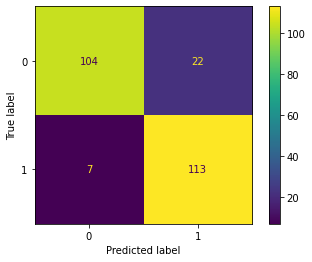

In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
y_val_pred = knn.predict(X_val)

print("ROC score: {:2.2}\n".format(metrics.roc_auc_score(y_val,y_val_pred)))
report = metrics.classification_report(y_val, y_pred)
print(report)

cf2=metrics.plot_confusion_matrix(knn, X_val, y_val)
plt.show(cf2)

#### Preprocess Test data

In [63]:
test['ethnicity'] = test["ethnicity"].str.replace("Others", "others")
# change ? to unknown category
test['ethnicity'] = test['ethnicity'].str.replace("?", "unknown")
test['relation'] = test['relation'].str.replace("?", "unknown")
test["age"] = np.log(test["age"])
# drop unwanted columns
test = test.drop(['age_desc','contry_of_res','ID','used_app_before'], axis= 1)
le = LabelEncoder()
for col in ['austim', 'gender', 'jaundice']:
    test[col] = le.fit_transform(test[col])
test.head()
test = pd.get_dummies(test)

In [64]:
test.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,ethnicity_unknown,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self,relation_unknown
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [116]:
sample = pd.read_csv("sample_submission.csv")
final_pred = knn.predict(test)
sample['Class/ASD'] = final_pred
sample.to_csv("submission_final.csv",index=False)